In [1]:
!pip install -q scikit-learn==1.5.2
!pip install -q --upgrade cubist
!pip install -q numpy==1.26.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 96.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.11 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
hdbscan 0.8.41 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.0/594.0 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 75.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.92 requires numpy>=2; python_vers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.utils import shuffle
import datetime as dt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from cubist import Cubist
from sklearn import tree
from scipy import stats

In [29]:
df_encoded = pd.read_csv('/content/Metro_Interstate_Traffic_Volume-encoded.csv', delimiter=',')


In [32]:
df_encoded['date_time'] = pd.to_datetime(df_encoded["date_time"], format='ISO8601')
df_encoded = df_encoded.set_index('date_time')
df_encoded

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,hour,day_of_year,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,...,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,5545,288.28,0.0,0.0,40,9,276,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-02 10:00:00,4516,289.36,0.0,0.0,75,10,276,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-02 11:00:00,4767,289.58,0.0,0.0,90,11,276,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-02 12:00:00,5026,290.13,0.0,0.0,90,12,276,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-02 13:00:00,4918,291.14,0.0,0.0,75,13,276,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543,283.45,0.0,0.0,75,19,273,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-09-30 20:00:00,2781,282.76,0.0,0.0,90,20,273,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-09-30 21:00:00,2159,282.73,0.0,0.0,90,21,273,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40575 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 72 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   traffic_volume                                           40575 non-null  int64  
 1   temp                                                     40575 non-null  float64
 2   rain_1h                                                  40575 non-null  float64
 3   snow_1h                                                  40575 non-null  float64
 4   clouds_all                                               40575 non-null  int64  
 5   hour                                                     40575 non-null  int64  
 6   day_of_year                                              40575 non-null  int64  
 7   holiday_Christmas Day                                    40575 non-null  floa

In [34]:
X = df_encoded.drop('traffic_volume',axis=1)
Y = df_encoded['traffic_volume']
train_size = int(len(Y) * 0.8)
test_size = len(Y) - train_size
xtrain, ytrain = X[:train_size], Y[:train_size]
xtest, ytest = X[train_size:], Y[train_size:]


In [12]:
tscv = TimeSeriesSplit(n_splits=5) # 5
for train_index, test_index in tscv.split(xtrain):
          print("TRAIN:", train_index, "TEST:", test_index)
          X_train, X_test = xtrain.iloc[train_index], xtrain.iloc[test_index]


TRAIN: [   0    1    2 ... 5407 5408 5409] TEST: [ 5410  5411  5412 ... 10817 10818 10819]
TRAIN: [    0     1     2 ... 10817 10818 10819] TEST: [10820 10821 10822 ... 16227 16228 16229]
TRAIN: [    0     1     2 ... 16227 16228 16229] TEST: [16230 16231 16232 ... 21637 21638 21639]
TRAIN: [    0     1     2 ... 21637 21638 21639] TEST: [21640 21641 21642 ... 27047 27048 27049]
TRAIN: [    0     1     2 ... 27047 27048 27049] TEST: [27050 27051 27052 ... 32457 32458 32459]


ЗАСТОСУВАННЯ ПЕРЕХРЕСНОЇ ПЕРЕВІРКИ

In [16]:
params_grid_tree = {'min_samples_leaf': [3, 5, 7, 10, 12, 13, 15, 17, 20],
               'max_features': [30, 40, 50, 55, 57, 60, 62, 65, 70, 74]}

decision_tree_model = DecisionTreeRegressor(random_state=42)
clf_tree = GridSearchCV(decision_tree_model, params_grid_tree, scoring ='r2',cv=tscv) #ADD VERBOSE = 3,
clf_tree.fit(xtrain, ytrain)
print('best_params: ', clf_tree.best_params_)
print('best_score: ', clf_tree.best_score_)
results_to_csv_tree= pd.DataFrame(clf_tree.cv_results_)
results_to_csv_tree.to_csv('DecisionTreeRegressor.csv')
pred_DecisionTree = clf_tree.predict(xtest)
print('\nR2 TEST : ', metrics.r2_score(ytest, pred_DecisionTree))
print('MAE TEST: ', metrics.mean_absolute_error(ytest, pred_DecisionTree))
print('RMSE TEST: ', metrics.root_mean_squared_error(ytest, pred_DecisionTree))
print('MAPE TEST',  metrics.mean_absolute_percentage_error(ytest, pred_DecisionTree)*100)
print('CORR TEST: ', stats.pearsonr(ytest, pred_DecisionTree))


best_params:  {'max_features': 57, 'min_samples_leaf': 13}
best_score:  0.9432420197337812

R2 TEST :  0.9517980640543848
MAE TEST:  257.2147420177573
RMSE TEST:  432.52643556971117
MAPE TEST 10.832673707036507
CORR TEST:  PearsonRResult(statistic=0.9757014874245824, pvalue=0.0)


In [17]:
params_grid_rf = {'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 9, 13, 15],
               'n_estimators': [650, 670, 700, 730, 770, 800],
               'max_features': [45, 50, 55, 60, 65]}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
clf_rf = GridSearchCV(rf, params_grid_rf, scoring ='r2', cv=tscv)
clf_rf.fit(xtrain, ytrain)
pred_rf = clf_rf.best_estimator_.predict(xtest)
print('best_params: ', clf_rf.best_params_)
print('best_score: ', clf_rf.best_score_)
results_to_csv_rf= pd.DataFrame(clf_rf.cv_results_)
results_to_csv_rf.to_csv('RandomForest.csv')
pred_RandomForest = clf_rf.predict(xtest)
print('\nR2 TEST : ', metrics.r2_score(ytest, pred_RandomForest))
print('MAE TEST: ', metrics.mean_absolute_error(ytest, pred_RandomForest))
print('RMSE TEST: ', metrics.root_mean_squared_error(ytest, pred_RandomForest))
print('MAPE TEST',  metrics.mean_absolute_percentage_error(ytest, pred_RandomForest)*100)
print('CORR TEST: ', stats.pearsonr(ytest, pred_RandomForest))


best_params:  {'max_features': 55, 'min_samples_leaf': 5, 'n_estimators': 700}
best_score:  0.9550628846421843

R2 TEST :  0.9631032734247036
MAE TEST:  223.98787435941284
RMSE TEST:  378.4202206053013
MAPE TEST 9.494489840635236
CORR TEST:  PearsonRResult(statistic=0.981401684497767, pvalue=0.0)


In [18]:
params_grid_cub = {'n_rules': [200, 300, 400, 500],
               'n_committees': [5, 10, 15, 20, 25, 30]}

cub = Cubist(random_state=42)
clf_cub = GridSearchCV(cub, params_grid_cub, scoring ='r2',cv=tscv)
clf_cub.fit(xtrain, ytrain)
print('best_params: ', clf_cub.best_params_)
print('best_score: ', clf_cub.best_score_)
results_to_csv_cub= pd.DataFrame(clf_cub.cv_results_)
results_to_csv_cub.to_csv('Cubist.csv')
pred_Cubist = clf_cub.predict(xtest)
print('\nR2 TEST : ', metrics.r2_score(ytest, pred_Cubist))
print('MAE TEST: ', metrics.mean_absolute_error(ytest, pred_Cubist))
print('RMSE TEST: ', metrics.root_mean_squared_error(ytest, pred_Cubist))
print('MAPE TEST',  metrics.mean_absolute_percentage_error(ytest, pred_Cubist)*100)
print('CORR TEST: ', stats.pearsonr(ytest, pred_Cubist))

best_params:  {'n_committees': 25, 'n_rules': 400}
best_score:  0.9535239515822596

R2 TEST :  0.9644110002802305
MAE TEST:  213.48933533805427
RMSE TEST:  371.65356794088575
MAPE TEST 9.023869573106316
CORR TEST:  PearsonRResult(statistic=0.9822588203588681, pvalue=0.0)


МОДЕЛІ З ПІДІБРАНИМИ ГІПЕРПАРАМЕТРАМИ

In [ ]:
model_decision_Tree = DecisionTreeRegressor(random_state = 42, max_features=57, min_samples_leaf=13)
model_decision_Tree.fit(xtrain, ytrain)
pred_DecisionTree = model_decision_Tree.predict(xtest)
print('R2 TEST : ', metrics.r2_score(ytest, pred_DecisionTree))
print('MAE TEST: ', metrics.mean_absolute_error(ytest, pred_DecisionTree))
print('RMSE TEST: ', metrics.root_mean_squared_error(ytest, pred_DecisionTree))
print('MAPE TEST',  metrics.mean_absolute_percentage_error(ytest, pred_DecisionTree)*100)
print('CORR TEST: ', stats.pearsonr(ytest, pred_DecisionTree))

R2 TEST :  0.9547432134497799
MAE TEST:  254.11468399294574
RMSE TEST:  419.1044503142799
MAPE TEST 10.669172139544933
CORR TEST:  PearsonRResult(statistic=0.977222431927162, pvalue=0.0)


In [ ]:
model_RandomForest = RandomForestRegressor(n_estimators=700, min_samples_leaf=5, max_features=55, random_state=42, n_jobs=-1)
model_RandomForest.fit(xtrain, ytrain)
pred_RandomForest = model_RandomForest.predict(xtest)
print('R2 TEST : ', metrics.r2_score(ytest, pred_RandomForest))
print('MAE TEST: ', metrics.mean_absolute_error(ytest, pred_RandomForest))
print('RMSE TEST: ', metrics.root_mean_squared_error(ytest, pred_RandomForest))
print('MAPE TEST: ',  metrics.mean_absolute_percentage_error(ytest, pred_RandomForest)*100)
print('CORR TEST: ', stats.pearsonr(ytest, pred_RandomForest))

R2 TEST :  0.9631439823015159
MAE TEST:  223.86250921665365
RMSE TEST:  378.21140379286066
MAPE TEST:  9.475112191142019
CORR TEST:  PearsonRResult(statistic=0.9814231351237552, pvalue=0.0)


In [ ]:
model_Cubist = Cubist(random_state = 42, n_rules=400, n_committees=25)
model_Cubist.fit(xtrain, ytrain)
pred_Cubist = model_Cubist.predict(xtest)
print('R2 TEST : ', metrics.r2_score(ytest, pred_Cubist))
print('MAE TEST: ', metrics.mean_absolute_error(ytest, pred_Cubist))
print('RMSE TEST: ', metrics.root_mean_squared_error(ytest, pred_Cubist))
print('MAPE TEST: ',  metrics.mean_absolute_percentage_error(ytest, pred_Cubist)*100)
print('CORR TEST: ', stats.pearsonr(ytest, pred_Cubist))

R2 TEST :  0.9641745713234688
MAE TEST:  214.0047343725932
RMSE TEST:  372.886030391417
MAPE TEST:  9.084994746611397
CORR TEST:  PearsonRResult(statistic=0.9821495584302171, pvalue=0.0)


In [36]:
pred_RandomForest_DF = pd.DataFrame(data = pred_RandomForest, columns=['predicted_traffic'], index = xtest.index)
pred_Cubist_DF = pd.DataFrame(data = pred_Cubist, columns=['predicted_traffic'], index = xtest.index)
pred_DecisionTree_DF = pd.DataFrame(data = pred_DecisionTree, columns=['predicted_traffic'], index = xtest.index)

In [21]:
import seaborn as sns

Реальний та прогнозавний транспортний потік для останнього тижня з тестової вибірки

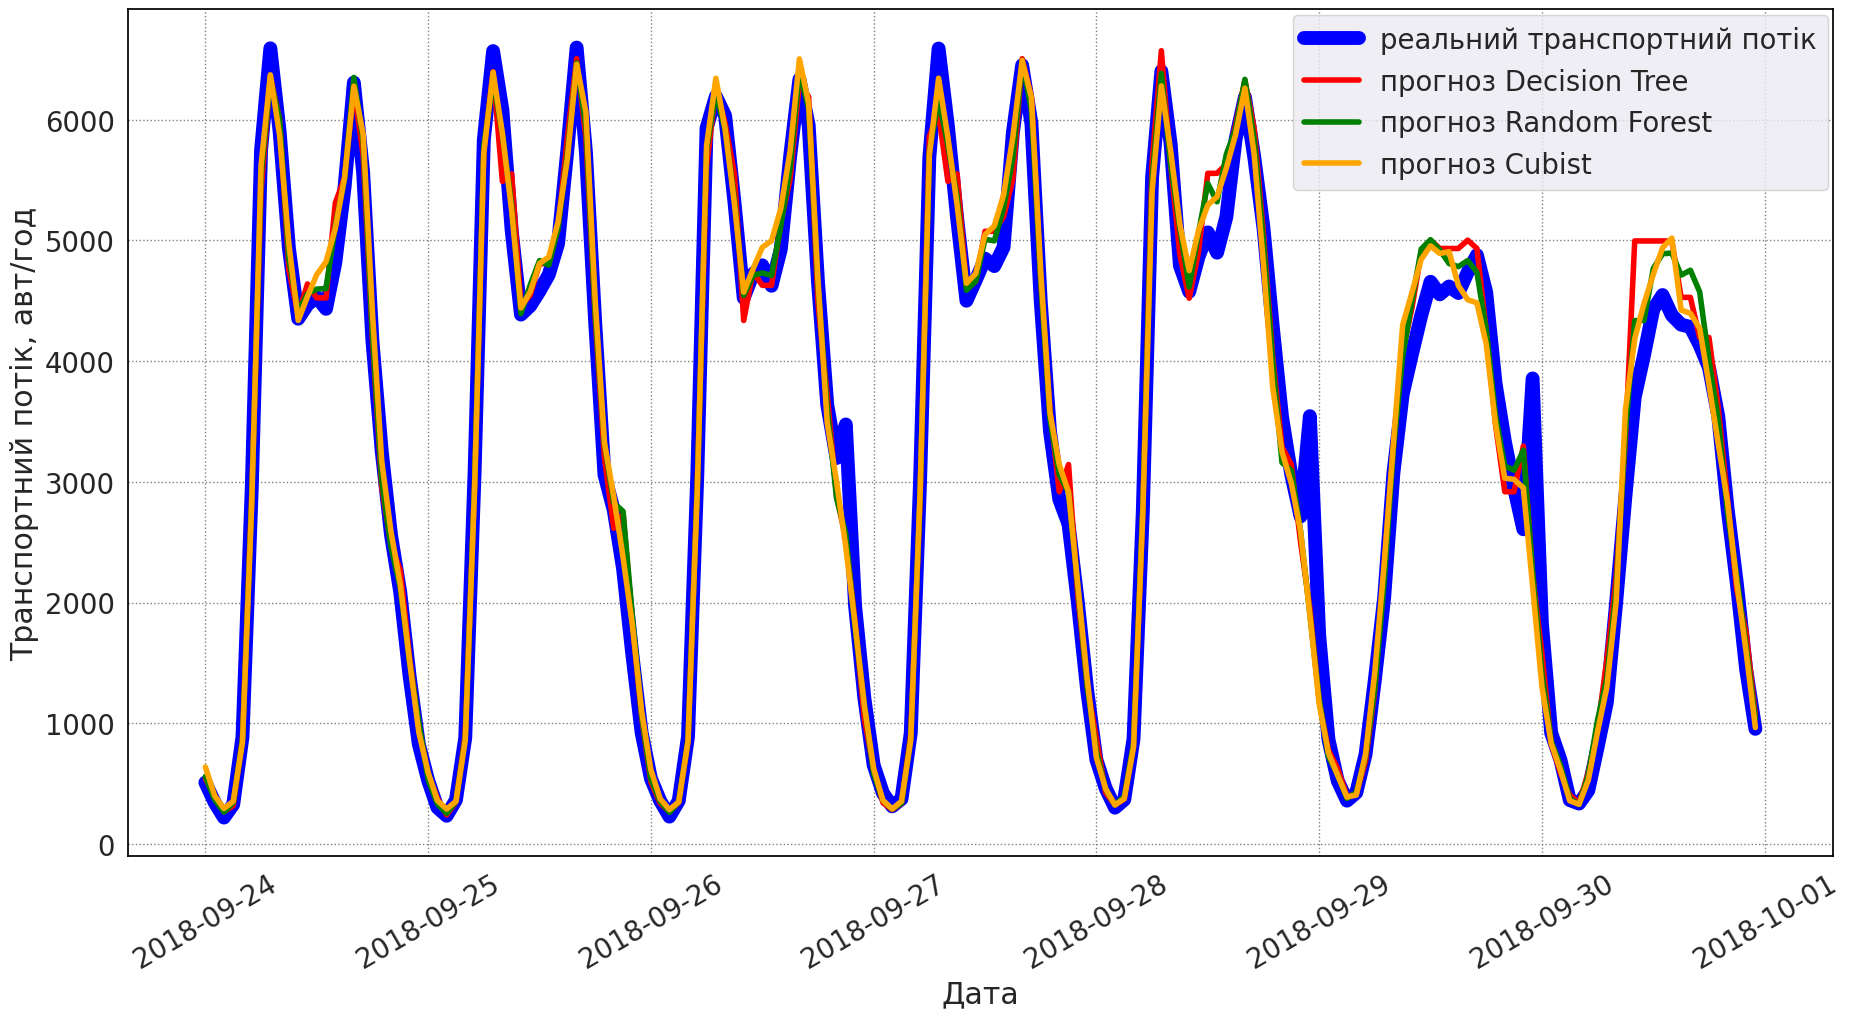

In [37]:
sns.set(font_scale=1.80)
fig, ax = plt.subplots(figsize=(22, 11))
plt.plot(ytest['2018-09-24':],linewidth=10, color='blue')
plt.plot(pred_DecisionTree_DF['2018-09-24':], linewidth=4, linestyle='-', color='red')
plt.plot(pred_RandomForest_DF['2018-09-24':], linewidth=4, linestyle='-', color='green')
plt.plot(pred_Cubist_DF['2018-09-24':], linewidth=4, linestyle='-', color='orange')
plt.xticks(rotation = 30)
plt.legend(['реальний транспортний потік', 'прогноз Decision Tree', 'прогноз Random Forest', 'прогноз Cubist'], bbox_to_anchor=(0.675,0.77))

ax.set( xlabel='Дата', ylabel='Транспортний потік, авт/год')
ax.set_facecolor("white")
ax.grid(axis='y', linestyle=':', color='gray', alpha=1, zorder=0)
ax.grid(axis='x', linestyle=':', color='gray', alpha=1, zorder=0)

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')